<a href="https://colab.research.google.com/github/MateusLucasFranco/ImplementacaoPCA/blob/main/Exercicio_de_Implementa%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Componentes Principais (PCA) em python.

In [ ]:
# Como primeiro passo, vamos importar a biblioteca pandas:
import pandas as pd

# O scikit-learn possui alguns conjuntos de dados prontos para uilitzarmos em aulas práticas. Nesse caso,
# vamos usar o scikit-learn para importar um dataset de caracteres manuscritos, somente como exemplo:
from sklearn.datasets import load_digits

In [ ]:
# Vamos carregar nosso dataset de dígitos, e explorá-lo um pouco:
dataset = load_digits()

print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [ ]:
print(dataset)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [ ]:
# Vamos agora ver o campo data (os nossos x's do dataset):
print(dataset.data.shape) # << Deveriam ser 1797 imagens de tamanho 8x8=64 pixels (veremos os valores).

(1797, 64)


In [ ]:
# Vejamos o primeiro vetor de x's. Repare que os pixels já foram convertidos em valores correspondentes a sua cor:
print( dataset.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
# Para vermos esse array de 64 valores como uma imagem, primeiro temos que transformá-lo numa matrix 8x8:
print(dataset.data[0].reshape(8,8))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 640x480 with 0 Axes>

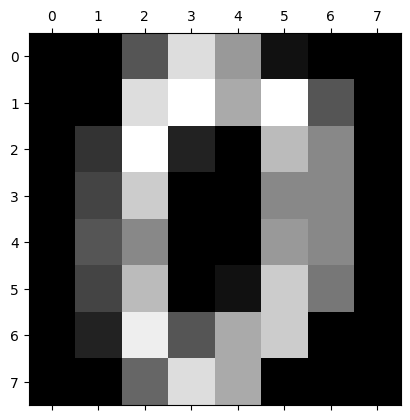

In [ ]:
# Para vermos esse vetor de números como a imagem original, vamos utilizar a matplotlib:
from matplotlib import pyplot as plt

plt.gray() # << Vamos ver imagens em escala de cinza:

# Plotando nossos exemplos do dataset como imagens:
plt.matshow(dataset.data[0].reshape(8,8))


In [ ]:
# Agora que vimos os valores de entrada (nossos x's) podemos ver os valores correspondentes de saída (y's):
import numpy as np

print(dataset.target[0]) # << Como podemos ver, a primeira imagem é um zero!

# Podemos ver agora todos os tipos de saídas (y's) existentes no dataset:
np.unique(dataset.target)

0


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Agora que já exploramos os dados, criando nosso dataframe:

In [ ]:
# Criando nosso dataframe:
df = pd.DataFrame( dataset.data, columns=dataset.feature_names)

# Imprimindo os primeiros valores, só para confirmar o resultado:
df.head(4)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0


In [ ]:
# Vamos ver uma descrição do dataset (estatísticas):
df.describe() # Vamos ver que os valores dos pixels vão de 0 a 16!


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [ ]:
# Criando nossos X's e nossos y's correspondentes:
X = df
y = dataset.target

In [ ]:
# Para utilizarmos qualquer PCA, o primeiro passo consiste em escalonar nossos dados para média 0 e Var 1:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Escalonando nosso dataset para que os valores tenham média 0 e variância 1.0:
X_scaled = scaler.fit_transform(X)

# Podemos ver que a relação entre os valores dos pixels se manteve, mas escalonados [-1.0, 1.0]:
print(X_scaled)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


In [ ]:
# Lembrem-se das nossas aulas anteriores. Precisamos dividir nosso dataset entre conjuntos de treino e teste:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.10, random_state=30)

In [ ]:
# Somente como exemplo, vamos usar um algoritmo de Regressão logística (podemos usar outros depois):
from sklearn.linear_model import LogisticRegression

# Criando o modelo:
model = LogisticRegression()
# Passando o conjunto de treino:
model.fit( X_train, y_train)
# E o conjutno de testes:
model.score(X_test, y_test)

0.9611111111111111

In [ ]:
# Agora podemos usar PCA nas amostras e ver como ele vai funcionar:
from sklearn.decomposition import PCA

# Podemos "forçar" o número de variáveis, ou estabelecer a porcentagem de variância que queremos capturar:

# Forçando o número de componentes seria:
# pca = PCA(n_components=3)

# Fixando somente a variância:
pca = PCA(0.99) # << Capturando 95% da variância.
# Calculando o PCA:
X_pca = pca.fit_transform(X_scaled)

# Imprimindo o novo shape, ou seja, o número de novos x's (o original é 64):
print(X_pca.shape)

(1797, 54)


In [ ]:
# Vamos imprimir a captura de variância de cada dimensão do PCA. Claro, as primeiras dimensões deveriam ser
# as mais importantes, portanto capturando mais variância:
print(pca.explained_variance_ratio_)

[0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.03389381 0.02998221 0.02932003 0.02781805 0.02577055
 0.02275303 0.0222718  0.02165229 0.01914167 0.01775547 0.01638069
 0.0159646  0.01489191 0.0134797  0.01271931 0.01165837 0.01057647
 0.00975316 0.00944559 0.00863014 0.00836643 0.00797693 0.00746471
 0.00725582 0.00691911 0.00653909 0.00640793 0.00591384 0.00571162
 0.00523637 0.00481808 0.00453719 0.00423163 0.00406053 0.00397085
 0.00356493 0.00340787 0.00327835 0.00311032 0.00288575 0.00276489
 0.00259175 0.00234483 0.00218257 0.00203598 0.00195512 0.00183318]


In [ ]:
# Agora podemos treinar nosso algoritmo novamente, utilizando os mesmos y's como saída, mas substituindo as
# entradas originais pelas entradas fornecidas pelo PCA:

# Dividindo o dataset novamente em treino e teste:
X_train_pca, X_test_pca, y_train, y_test = train_test_split( X_pca, y, test_size=0.30, random_state=30)

# Treinando novamente os dados:

# Criando o modelo:
model_pca = LogisticRegression()
# Passando o conjunto de treino:
model_pca.fit( X_train_pca, y_train)
# E o conjutno de testes:
model_pca.score(X_test_pca, y_test)


0.9722222222222222

# Exercícios:
Nesse exercício os alunos devem, a partir da aula prática sobre PCA, escolher um novo algoritmo de Aprendizado Supervisionado a sua escolha.

Uma vez escolhido o algoritmo a ser utilizado, os alunos devem treinar dois modelos: um utilizando como entrada o dataset original, e outro utilizando como entrada o dataset de treinamento resultante da utilização do PCA, da mesma forma que fizemos durante nossas aulas.

Finalmente,  o resultado deve ser registrado no github dos alunos, e um link deve ser enviado como tarefa.

Mateus Lucas Franco - 202010520

In [ ]:
#Fiz os comentários para quando eu for revisar pra AVD me guiar facilmente.
#Aqui estou importando a biblioteca necessária
from sklearn.tree import DecisionTreeClassifier

#Por precaução vou carregar o dataset denovo
dataset = load_digits()

#Vou criar o dataframe denovo tbm
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

#Mesma coisa aq
X = df
y = dataset.target

#Mesma coisa aq²
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Vou dividir em conjunto de treinamento e teste denovo tbm
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10, random_state=30)

#Aqui eu criei o modelo com o conjunto de dados originais usando a Arvore de Decisao
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

#Modelo com o conjunto original
precisao_original = dt_model.score(X_test, y_test)
print("Precisão usando dataset original:", precisao_original)

#Aqui apliquei PCA no dataset original
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_pca = pca.fit_transform(X_scaled)

#Aqui eu dividi em conjuntos de treinamento e teste
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.10, random_state=30)

#Aqui eu criei o modelo com o junto de dados pca usando a Arvore de Decisao
dt_model_pca = DecisionTreeClassifier()
dt_model_pca.fit(X_train_pca, y_train)

#Modelo com o conjunto pca
precisao_pca = dt_model_pca.score(X_test_pca, y_test)
print("Precisão usando dataset PCA:", precisao_pca)

Precisão usando dataset original: 0.8777777777777778
Precisão usando dataset PCA: 0.8333333333333334
